In [2]:
import pandas as pd
import numpy as np

In [3]:
# 절대모멘텀
# 파일 로드 
# 파생변수 생성 (년-월) STD_YM > date 컬럼의 값을 년과 월만 추출 대입
# 년, 월 별 마지막 날 month_last_dt 데이터프레임 삽입 
# 전 월의 종가의 값을 가지는 파생변수 생성 
# 전년도의 종가의 값을 가지는 파생변수 생성
# 전월 전년도의 종가를 가지고 거래내역을 생성
# 수익률 계산  

In [4]:
df = pd.read_csv("../csv/SPY.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.896694,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.953669,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.238594,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.352570,531500


In [5]:
# 새로운 파생변수 STD-YM 생성
# date 컬럼을 기준으로 년=월 추출해서 파생변수 대입

# Date 컬럼의 데이터형을 datetime으로 변경
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# STD_YM 커럼을 만들어서 Date 컬럼에서 년(4자리)-월 추출

df["STD_YM"] = df["Date"].dt.strftime("%Y-%m")

df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume,STD_YM
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200,1993-01
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.896694,480500,1993-02
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.953669,201300,1993-02
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.238594,529400,1993-02
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.352570,531500,1993-02


In [6]:
# 년-월 별 마지막 날 데이터 들을 추출
# 새로운 데이터 프레임에 결합 

month_last_df = df[~(df.shift(-1)["STD_YM"] == df["STD_YM"])]
month_last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 6647
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       318 non-null    datetime64[ns]
 1   Open       318 non-null    float64       
 2   High       318 non-null    float64       
 3   Low        318 non-null    float64       
 4   Close      318 non-null    float64       
 5   Adj Close  318 non-null    float64       
 6   Volume     318 non-null    int64         
 7   STD_YM     318 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 22.4+ KB


In [7]:
month_last_df = pd.DataFrame()
month_list = df["STD_YM"].unique()


for i in month_list :
    last_df = df[df["STD_YM"] == i].tail(1)
    month_last_df = pd.concat([month_last_df, last_df])
month_last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 6647
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       318 non-null    datetime64[ns]
 1   Open       318 non-null    float64       
 2   High       318 non-null    float64       
 3   Low        318 non-null    float64       
 4   Close      318 non-null    float64       
 5   Adj Close  318 non-null    float64       
 6   Volume     318 non-null    int64         
 7   STD_YM     318 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 22.4+ KB


In [8]:
# "Date" 컬럼을 인덱스 변환 

month_last_df.set_index(["Date"], inplace=True)

In [9]:
# month_last_df 파생변수 두개를 생성 
# BF_1M 전월의 종가의(Adj Close) 값
# BF_12M 전년도 종가의(Adj Close) 값
# NaN이 나오면 0으로 대체 

month_last_df.head()

,Open,High,Low,Close,Adj Close,Volume,STD_YM
Date,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200,1993-01
1993-02-26,44.43750,44.43750,44.18750,44.40625,26.991682,66200,1993-02
1993-03-31,45.34375,45.46875,45.18750,45.18750,27.596252,111600,1993-03
1993-04-30,44.12500,44.28125,44.03125,44.03125,26.890142,88500,1993-04
1993-05-28,45.40625,45.40625,45.00000,45.21875,27.615356,79100,1993-05


In [10]:
month_last_df["Adj Close"].shift(1).fillna(0)
month_last_df["BF_1M"] = month_last_df["Adj Close"].shift(1).fillna(0)

In [11]:
month_last_df["Adj Close"].shift(12).fillna(0)
month_last_df["BF_12M"] = month_last_df["Adj Close"].shift(12).fillna(0)

In [12]:
# month_last_df.iloc[10:15]

,Open,High,Low,Close,Adj Close,Volume,STD_YM,BF_1M,BF_12M
Date,,,,,,,,,
1993-11-30,46.28125,46.5625,46.25000,46.34375,28.680576,230000,1993-11,28.990005,0.000000
1993-12-31,46.93750,47.0000,46.56250,46.59375,29.032679,312900,1993-12,28.680576,0.000000
1994-01-31,48.06250,48.3125,48.00000,48.21875,30.045223,313800,1994-01,29.032679,26.706757
1994-02-28,46.93750,47.0625,46.81250,46.81250,29.168985,333000,1994-02,30.045223,26.991682
1994-03-31,44.46875,44.6875,43.53125,44.59375,27.946764,788800,1994-03,29.168985,27.596252


In [13]:
# loc iloc 
# loc > index와 colunm의 값을 비교하여 True인 행과 열을 출력
    # loc[index, colunms]
    # loc[1] >> index의 값이 1인 행 출력
    

# iloc index와 colunm의 위치를 출력
    # 데이터프레임에 두번째 행 출력 > iloc[1]
    # 데이터프레임에서 두 번째  열 출력 iloc[:,1]
    

In [14]:
df.set_index(["Date"], inplace=True)

In [15]:
# 거래내역 추가 
# 구매의 조건 > 전월의 종가 / 전년도 종가 -1 의 값이 0보다 크고 무한대가 아닌 경우 "buy"

df["trade"] = ""

for i in month_last_df.index :
    signal = ""
    
    # 절대 모멘텀 계산
    momentum_index = month_last_df.loc[i, "BF_1M"] / month_last_df.loc[i,"BF_12M"] - 1

    # 절대 모멘텀 지표에 따라서 true/ false 구분
    flag = True if((momentum_index>0) and (momentum_index != np.inf) and (momentum_index != -np.inf)) else False

    if flag : 
        signal = "buy"
    print("날짜 : ", i, "모멘텀 인덱스 : ", momentum_index, "flag:", flag, "signal : ", signal)
    df.loc[i, "trade"] = signal

df["trade"].value_counts()


날짜 :  1993-01-29 00:00:00 모멘텀 인덱스 :  nan flag: False signal :  
날짜 :  1993-02-26 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-03-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-04-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-05-28 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-06-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-07-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-08-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-09-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-10-29 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-11-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1993-12-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1994-01-31 00:00:00 모멘텀 인덱스 :  0.08709114326385659 flag: True signal :  buy
날짜 :  1994-02-28 00:00:00 모멘텀 인덱스 :  0.1131289632117034 flag: True signal :  buy
날짜 :  1994-03-31 00:00:00 모멘텀 인덱스 :  0.05699081889816049 flag: True s

C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\1770043431.py:10: RuntimeWarning: invalid value encountered in double_scalars
  momentum_index = month_last_df.loc[i, "BF_1M"] / month_last_df.loc[i,"BF_12M"] - 1
C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\1770043431.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  momentum_index = month_last_df.loc[i, "BF_1M"] / month_last_df.loc[i,"BF_12M"] - 1


       6401
buy     247
Name: trade, dtype: int64

In [16]:
# 수익률 계산 

rtn = 1.0
df["return"] = 1
buy = 0
sell = 0

for i in df.index : 
    # 구매한 날짜를 체크 trade = "buy" 전 행의 trade가 "" 인 경우
    if df.loc[i,"trade"] == "buy" and df.shift(1).loc[i,"trade"] == "" :
        buy = df.loc[i, "Adj Close"]
        print("구매일 : ", i, "구매가격 : ", buy)
    elif df.loc[i,"trade"] == "" and df.shift(1).loc[i,"trade"] == "buy":
        sell = df.loc[i,"Adj Close"]
        rtn = (sell - buy) / buy +1
        df.loc[i,"return"] = rtn
        print("판매일 : ", i, "판매가격 : ", sell, "수익률 : ", rtn)

    if df.loc[i, "trade"] == "" :
        buy = 0
        sell =0

구매일 :  1994-01-31 00:00:00 구매가격 :  30.045223
판매일 :  1994-02-01 00:00:00 판매가격 :  29.889435 수익률 :  0.9948148828850429
구매일 :  1994-02-28 00:00:00 구매가격 :  29.168985
판매일 :  1994-03-01 00:00:00 판매가격 :  29.052134 수익률 :  0.995993998419897
구매일 :  1994-03-31 00:00:00 구매가격 :  27.946764
판매일 :  1994-04-04 00:00:00 판매가격 :  27.5159 수익률 :  0.9845826872835794
구매일 :  1994-04-29 00:00:00 구매가격 :  28.260098
판매일 :  1994-05-02 00:00:00 판매가격 :  28.436377 수익률 :  1.0062377349151443
구매일 :  1994-05-31 00:00:00 구매가격 :  28.710556
판매일 :  1994-06-01 00:00:00 판매가격 :  28.837847 수익률 :  1.00443359578268
구매일 :  1994-06-30 00:00:00 구매가격 :  28.052668
판매일 :  1994-07-01 00:00:00 판매가격 :  28.111818 수익률 :  1.0021085338478322
구매일 :  1994-07-29 00:00:00 구매가격 :  28.959522
판매일 :  1994-08-01 00:00:00 판매가격 :  29.097498 수익률 :  1.0047644432805212
구매일 :  1994-08-31 00:00:00 구매가격 :  30.063478
판매일 :  1994-09-01 00:00:00 판매가격 :  29.964916 수익률 :  0.9967215370091245
구매일 :  1994-09-30 00:00:00 구매가격 :  29.30423
판매일 :  1994-10-03 00:00:00 판매가격 :

In [17]:
acc_rtn = 1

for i in df.index:
    rtn = df.loc[i,"return"]
    acc_rtn *= rtn
    df.loc[i, "acc_rtn"] = acc_rtn
    
print("누적 수익률 : ", acc_rtn)

누적 수익률 :  2.0162118510060383


In [18]:
# 절대 모멘턴 함수로 구현 
# 1. 1번 함수
    # 매개변수 2개 (데이터 프레임, 기준이 되는 컬럼)
    # 데이터프레임 결측치와 이상치 제거   
    # Date 컬럼의 데이터를 시계열로 변환
    # STD_YM 파생변수를 생성하여 년-월 대입
    # 인덱스를 Date을 변경
    # 수정이 된 데이터프레임 리턴

# 2번 함수 
    # 매개변수(df) 하나(데이터프레임)
    # 새로운 데이터프레임 생성
    # df의 데이터에서  년 월별 마지막 데이터 들을 새로운 데이터 프레임에 삽입
    # 새로운 데이터프레임에 파생변수 두 개 생성 "BF_1M" "BF_12M"
    # 새로운 데이터 프레임 리턴

In [42]:
# 1번함수
def first(data, col) :

    # 조건식 이용해서 데이터형태를 같게 csv / yfinance
    # if type(data.index[0]) != int:
    if "Date" not in data.columns : 
        data.reset_index(inplace = True)


    # 결측치 이상치 제거
    result = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
    # Date컬럼과 기준이 되는 컬럼 두 컬럼만 두고 나머지 컬럼은 삭제
    result = result.loc[:,["Date",col]] 
    result["Date"] = pd.to_datetime(result["Date"])
    result["STD_YM"] = result["Date"].dt.strftime("%Y-%m")
    result.set_index("Date", inplace =  True)
    return result


In [20]:
test = pd.read_csv("../csv/MSFT.csv")

test_df = first(test, "Adj Close")
test_df

C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\3454669699.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]


,Adj Close,STD_YM
Date,,
1986-03-13,0.069996,1986-03
1986-03-14,0.072496,1986-03
1986-03-17,0.073746,1986-03
1986-03-18,0.071871,1986-03
1986-03-19,0.070621,1986-03
...,...,...
2019-06-18,135.160004,2019-06
2019-06-19,135.690002,2019-06
2019-06-20,136.949997,2019-06


In [21]:
# 2번 함수 
    # 매개변수(df) 하나(데이터프레임)
    # 새로운 데이터프레임 생성
    # df의 데이터에서  년 월별 마지막 데이터 들을 새로운 데이터 프레임에 삽입
    # 새로운 데이터프레임에 파생변수 두 개 생성 "BF_1M" "BF_12M"
    # 결측치 이상치 0으로 치환
    # 새로운 데이터 프레임 리턴

In [22]:
# 2번 함수 

def second(data):
    col = data.columns[0]
    result = data[~(data.shift(-1)["STD_YM"] == data["STD_YM"])]
    result["BF_1M"] = result.shift(1)[col].fillna(0)
    result["BF_12M"] = result.shift(12)[col].fillna(0)
    return result


In [27]:
test_df_1 = second(test_df)

C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\1921216048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["BF_1M"] = result.shift(1)[col].fillna(0)
C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\1921216048.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["BF_12M"] = result.shift(12)[col].fillna(0)


In [24]:
# 3번 함수 
    # 매개변수 2개(df_1,df_2)
    # df_1에 trade 컬럼 형성 값 = ""
    # dfldp return 컬럼 생성 값은 1
    # df_2 값들을 이용하여 momentum index를 구하고 df_1에 거래내역 대입
    # df_1에  거래내역을 이용하여 수익률 return에 대입 
    # return 값들을 가지고 누적 수익률 acc_rtn에 대입 
    # 누적 수익률 print()
    # df1 리턴

In [25]:
# 3번 함수

def third (df1,df2) :
    df1["trade"] = ""
    df1["return"] = 1

    for i in df2.index :
        signal = ""
        
        momentum_index = df2.loc[i, "BF_1M"] / df2.loc[i,"BF_12M"] - 1
        flag = True if((momentum_index>0) and (momentum_index != np.inf) and (momentum_index != -np.inf)) else False

        if flag : 
            signal = "buy"
        print("날짜 : ", i, "모멘텀 인덱스 : ", momentum_index, "flag:", flag, "signal : ", signal)
        df1.loc[i, "trade"] = signal

    rtn = 1.0
    buy = 0
    sell = 0
    col = df1.columns[0]

    for i in df1.index : 
        # 구매한 날짜를 체크 trade = "buy" 전 행의 trade가 "" 인 경우
        if df1.loc[i,"trade"] == "buy" and df1.shift(1).loc[i,"trade"] == "" :
            buy = df1.loc[i, col]
            print("구매일 : ", i, "구매가격 : ", buy)
        elif df1.loc[i,"trade"] == "" and df1.shift(1).loc[i,"trade"] == "buy":
            sell = df1.loc[i,col]
            rtn = (sell - buy) / buy +1
            df1.loc[i,"return"] = rtn
            print("판매일 : ", i, "판매가격 : ", sell, "수익률 : ", rtn)

        if df1.loc[i, "trade"] == "" :
            buy = 0
            sell =0

    acc_rtn = 1

    for i in df1.index:
        rtn = df1.loc[i,"return"]
        acc_rtn *= rtn
        df1.loc[i, "acc_rtn"] = acc_rtn
        
    print("누적 수익률 : ", acc_rtn) 
    
    return df1
    


In [30]:
a = third(test_df,test_df_1)
a

C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\245353002.py:10: RuntimeWarning: invalid value encountered in double_scalars
  momentum_index = df2.loc[i, "BF_1M"] / df2.loc[i,"BF_12M"] - 1
C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\245353002.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  momentum_index = df2.loc[i, "BF_1M"] / df2.loc[i,"BF_12M"] - 1


날짜 :  1986-03-31 00:00:00 모멘텀 인덱스 :  nan flag: False signal :  
날짜 :  1986-04-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1986-05-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1986-06-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1986-07-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1986-08-29 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1986-09-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1986-10-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1986-11-28 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1986-12-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1987-01-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1987-02-27 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1987-03-31 00:00:00 모멘텀 인덱스 :  1.7909114712128704 flag: True signal :  buy
날짜 :  1987-04-30 00:00:00 모멘텀 인덱스 :  2.0000124038700076 flag: True signal :  buy
날짜 :  1987-05-29 00:00:00 모멘텀 인덱스 :  1.971415509457683 flag: True sign

,Adj Close,STD_YM,trade,return,acc_rtn
Date,,,,,
1986-03-13,0.069996,1986-03,,1.0,1.000000
1986-03-14,0.072496,1986-03,,1.0,1.000000
1986-03-17,0.073746,1986-03,,1.0,1.000000
1986-03-18,0.071871,1986-03,,1.0,1.000000
1986-03-19,0.070621,1986-03,,1.0,1.000000
...,...,...,...,...,...
2019-06-18,135.160004,2019-06,,1.0,2.014577
2019-06-19,135.690002,2019-06,,1.0,2.014577
2019-06-20,136.949997,2019-06,,1.0,2.014577


<AxesSubplot: xlabel='Date'>

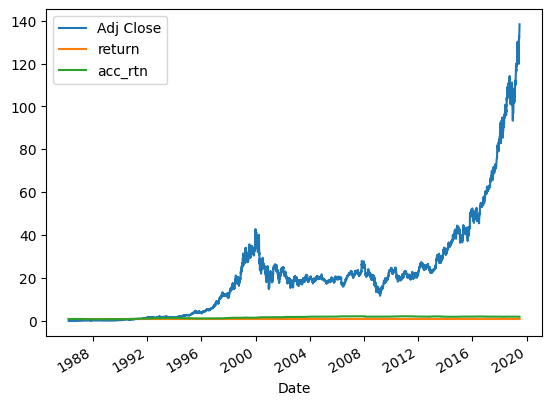

In [31]:
a.plot()

In [32]:
df__1 = pd.read_csv("../csv/GM.csv")

In [34]:
bb = first(df__1,"Adj Close")
bb

C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\3454669699.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]


,Adj Close,STD_YM
Date,,
2010-11-18,27.027195,2010-11
2010-11-19,27.082527,2010-11
2010-11-22,26.940243,2010-11
2010-11-23,26.284130,2010-11
2010-11-24,26.465942,2010-11
...,...,...
2019-06-18,36.700001,2019-06
2019-06-19,36.779999,2019-06
2019-06-20,36.959999,2019-06


In [36]:
qq = second(bb)
qq

C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\1921216048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["BF_1M"] = result.shift(1)[col].fillna(0)
C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\1921216048.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["BF_12M"] = result.shift(12)[col].fillna(0)


,Adj Close,STD_YM,BF_1M,BF_12M
Date,,,,
2010-11-30,27.035101,2010-11,0.000000,0.000000
2010-12-31,29.137827,2010-12,27.035101,0.000000
2011-01-31,28.845346,2011-01,29.137827,0.000000
2011-02-28,26.505461,2011-02,28.845346,0.000000
2011-03-31,24.529219,2011-03,26.505461,0.000000
...,...,...,...,...
2019-02-28,38.677559,2019-02,38.226913,37.035156
2019-03-29,36.706638,2019-03,38.677559,34.550106
2019-04-30,38.537029,2019-04,36.706638,34.930408


In [38]:
zz = third(bb,qq)

C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\245353002.py:10: RuntimeWarning: invalid value encountered in double_scalars
  momentum_index = df2.loc[i, "BF_1M"] / df2.loc[i,"BF_12M"] - 1
C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\245353002.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  momentum_index = df2.loc[i, "BF_1M"] / df2.loc[i,"BF_12M"] - 1


날짜 :  2010-11-30 00:00:00 모멘텀 인덱스 :  nan flag: False signal :  
날짜 :  2010-12-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-01-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-02-28 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-03-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-04-29 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-05-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-06-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-07-29 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-08-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-09-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-10-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2011-11-30 00:00:00 모멘텀 인덱스 :  -0.24415192678584774 flag: False signal :  
날짜 :  2011-12-30 00:00:00 모멘텀 인덱스 :  -0.4224090217846376 flag: False signal :  
날짜 :  2012-01-31 00:00:00 모멘텀 인덱스 :  -0.4445053978551686 flag: False si

<AxesSubplot: xlabel='Date'>

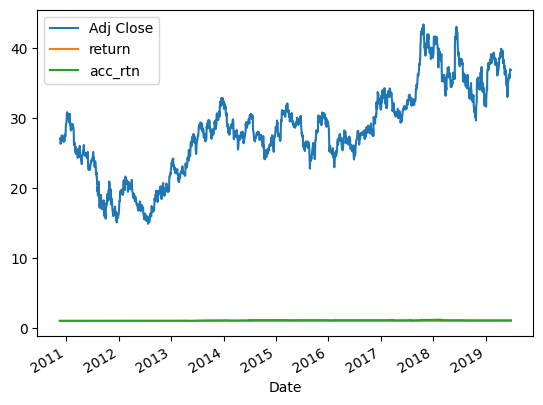

In [39]:
zz.plot()

In [61]:
import yfinance as yf

In [62]:
yf_df = yf.download("003490.ks",start = "2018-01-01")
# yf_df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [45]:
first(yf_df,"Adj Close")

C:\Users\이주노\AppData\Local\Temp\ipykernel_63688\463139179.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]


In [55]:
import Momentum as mmt 
import imp
imp.reload(mmt)

<module 'Momentum' from 'c:\\금융 빅데이터\\221222\\Momentum\\__init__.py'>

In [64]:
mmt1 = mmt.Momentum(yf_df,"Close")

In [65]:
mmt1.testing()

c:\금융 빅데이터\221222\Momentum\__init__.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  self.df= self.df[~self.df.isin([np.nan, np.inf, -np.inf]).any(1)]
c:\금융 빅데이터\221222\Momentum\__init__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df2["BF_1M"] = self.df2.shift(1)[slef.col].fillna(0)
c:\금융 빅데이터\221222\Momentum\__init__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df2["BF_12M"] = self.df2.shift(12)[self.col].fi

날짜 :  2018-01-31 00:00:00 모멘텀 인덱스 :  nan flag: False signal :  
날짜 :  2018-02-28 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-03-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-04-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-05-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-06-29 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-07-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-08-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-09-28 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-10-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-11-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2018-12-28 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  2019-01-31 00:00:00 모멘텀 인덱스 :  -0.1426718547341116 flag: False signal :  
날짜 :  2019-02-28 00:00:00 모멘텀 인덱스 :  0.11485451761102605 flag: True signal :  buy
날짜 :  2019-03-29 00:00:00 모멘텀 인덱스 :  0.08875739644970415 flag: True si

,Close,STD_YM,trade,return,acc_rtn
Date,,,,,
2018-01-02,35900.0,2018-01,,1.0,1.000000
2018-01-03,35750.0,2018-01,,1.0,1.000000
2018-01-04,34900.0,2018-01,,1.0,1.000000
2018-01-05,34900.0,2018-01,,1.0,1.000000
2018-01-08,36100.0,2018-01,,1.0,1.000000
...,...,...,...,...,...
2022-12-16,24700.0,2022-12,,1.0,1.072949
2022-12-19,24600.0,2022-12,,1.0,1.072949
2022-12-20,24450.0,2022-12,,1.0,1.072949


In [57]:
t_dp = pd.read_csv("../csv/AMZN.csv")

In [59]:
mmt2 = mmt.Momentum(t_dp, "Adj Close")

In [60]:
mmt2.testing()

c:\금융 빅데이터\221222\Momentum\__init__.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  self.df= self.df[~self.df.isin([np.nan, np.inf, -np.inf]).any(1)]
c:\금융 빅데이터\221222\Momentum\__init__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df2["BF_1M"] = self.df2.shift(1)[slef.col].fillna(0)
c:\금융 빅데이터\221222\Momentum\__init__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df2["BF_12M"] = self.df2.shift(12)[self.col].fi

날짜 :  1997-05-30 00:00:00 모멘텀 인덱스 :  nan flag: False signal :  
날짜 :  1997-06-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1997-07-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1997-08-29 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1997-09-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1997-10-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1997-11-28 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1997-12-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1998-01-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1998-02-27 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1998-03-31 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1998-04-30 00:00:00 모멘텀 인덱스 :  inf flag: False signal :  
날짜 :  1998-05-29 00:00:00 모멘텀 인덱스 :  4.0972219999999995 flag: True signal :  buy
날짜 :  1998-06-30 00:00:00 모멘텀 인덱스 :  3.7635124835648686 flag: True signal :  buy
날짜 :  1998-07-31 00:00:00 모멘텀 인덱스 :  5.9391314002269775 flag: True sig

,Adj Close,STD_YM,trade,return,acc_rtn
Date,,,,,
1997-05-15,1.958333,1997-05,,1.0,1.00000
1997-05-16,1.729167,1997-05,,1.0,1.00000
1997-05-19,1.708333,1997-05,,1.0,1.00000
1997-05-20,1.635417,1997-05,,1.0,1.00000
1997-05-21,1.427083,1997-05,,1.0,1.00000
...,...,...,...,...,...
2019-06-18,1901.369995,2019-06,,1.0,1.03362
2019-06-19,1908.790039,2019-06,,1.0,1.03362
2019-06-20,1918.189941,2019-06,,1.0,1.03362
